<a href="https://colab.research.google.com/github/imshiv-10/Statistics-DataScience/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1. Linear Models
The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if 
y
^
 is the predicted value.

y
^
(
w
,
x
)
=
w
0
+
w
1
x
1
+
.
.
.
+
w
p
x
p
Across the module, we designate the vector 
w
=
(
w
1
,
.
.
.
,
w
p
)
 as coef_
 
  and w0 as intercept_.



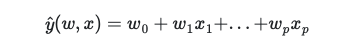

## 1. Ordinary Least Squares

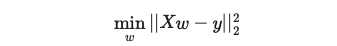

- OLS is loss function/ objective function it will share the loss to optimization.
- The optimization functions are reducing the residuals

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0,0], [1,1],[2,2],[3,3]],[0,1,2,3])
reg.coef_
reg.intercept_

4.440892098500626e-16

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score 

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
diabetes_X =  diabetes_X[:,np.newaxis, 2]

In [ ]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
regr.score(diabetes_X_train, diabetes_y_train)

0.3351312506867543

In [74]:
predictions_train = regr.predict(diabetes_X_train)
predictions_test = regr.predict(diabetes_X_test)

In [75]:
# In r2_score loss function will be [0,1] then r2_score is 1 it's having high accuracy and model performs well
r2_score(diabetes_y_train, predictions_train)

0.3351312506867543

In [76]:
mean_squared_error(diabetes_y_train, predictions_train)

3955.019853401393

In [77]:
mean_squared_error(diabetes_y_test, predictions_test)

2548.0723987259694

In [31]:
print("_coefficients:",regr.coef_)
print("_intercepts:", regr.intercept_)

_coefficients: [938.23786125]
_intercepts: 152.91886182616167


In [33]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, regr.predict(diabetes_X_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, regr.predict(diabetes_X_test)))

Mean squared error: 2548.07
Coefficient of determination: 0.47


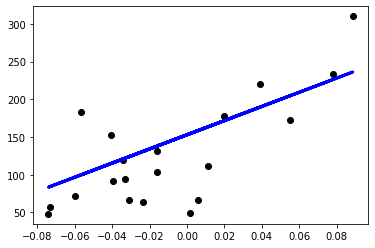

In [37]:

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color="blue", linewidth=3)

plt.show()

## 2.  Ridge regression and classification

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

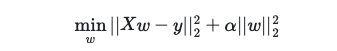

The complexity parameter 
α
≥
0
 controls the amount of shrinkage: the larger the value of 
α
, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

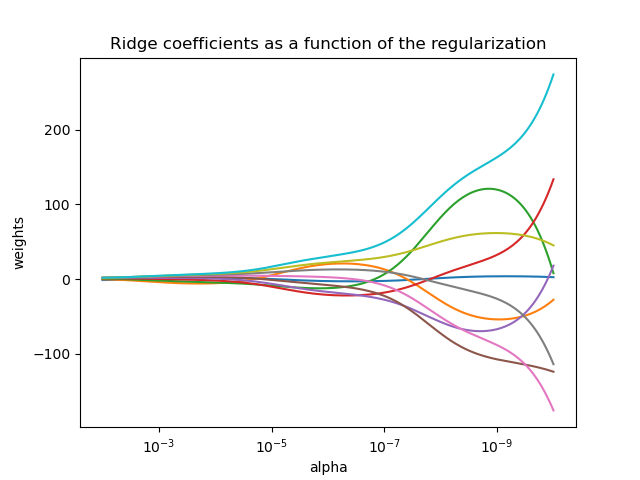

In [39]:
reg_ridge = linear_model.Ridge()
reg_ridge.fit(diabetes_X_train, diabetes_y_train)

Ridge()

In [42]:
rigid_predictions = reg_ridge.predict(diabetes_X_train)
r2_score(diabetes_y_train, rigid_predictions)

0.24750834362605756

In [43]:
reg_ridge.score(diabetes_X_train, diabetes_y_train)

0.24750834362605756

In [44]:
mean_squared_error(rigid_predictions, diabetes_y_train)

4476.25105489155

In [59]:
def rigid_hypertuning(model, theta, _inputs,_targets):
  regr_  = model
  regr_.fit(_inputs, _targets)
  _predictions = regr.predict(_inputs)
  loss_r2 = regr_.score(_inputs, _targets)
  loss_mse = mean_squared_error(_targets, _predictions)
  # plot the loss vs w.r.to theta
  return loss_r2, loss_mse

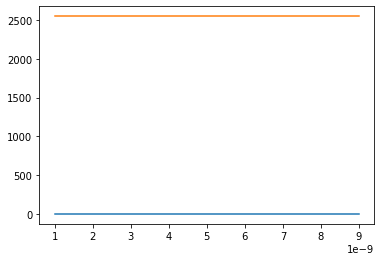

In [72]:
r2_loss_, loss_mse_ = [], []
for i in np.arange(0.000000001,0.00000001,0.000000001):
  r2_loss, loss_mse = rigid_hypertuning(linear_model.Ridge(alpha=i), i, diabetes_X_test, diabetes_y_test)
  r2_loss_.append(r2_loss)
  loss_mse_.append(loss_mse)
plt.plot(np.arange(0.000000001,0.00000001,0.000000001),r2_loss_)
plt.plot(np.arange(0.000000001,0.00000001,0.000000001),loss_mse_)  

In [73]:
loss_mse_

[2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694,
 2548.0723987259694]

In [78]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01